# 가장 좋은 성능을 낸 spec 

#### 각 hidden layer의 neuron의 수  
- hid_neu = 32  
  
#### epoch의 수  
- epochs : 30회  
    
#### 데이터 샘플의 갯수  
- numofsamples = 25000개  
  
### Batch Size   
- 200개  
  
#### hidden layer의 수  
- 1  

#### activation 함수 선정  
- Hidden Layer, Activation = selu  
- Output Layer, Activation = relu  
- optimizer : sgd
- loss function  : MSLE 사용  

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 32)                160       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
Train on 17500 samples, validate on 7500 samples
Epoch 1/30
17500/17500 - 1s - loss: 3.6492 - val_loss: 1.4883
Epoch 2/30
17500/17500 - 0s - loss: 1.0012 - val_loss: 0.6726
Epoch 3/30
17500/17500 - 0s - loss: 0.5081 - val_loss: 0.3810
Epoch 4/30
17500/17500 - 0s - loss: 0.3025 - val_loss: 0.2389
Epoch 5/30
17500/17500 - 0s - loss: 0.1952 - val_loss: 0.1591
Epoch 6/30
17500/17500 - 0s - loss: 0.1325 - val_loss: 0.1105
Epoch 7/30
17500/17500 - 0s - loss: 0.0934 - val_loss: 0.0793
Epoch 8/30
17500/17500 - 0s - loss

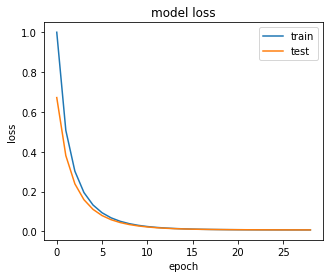

train loss= 0.007122239377349615
test loss= 0.007211511464168628



y actual value =  23.3
y predicted value = 23.350405



Ι예측값 - 실제값Ι 0.050405
99.7837 %
5.45 초


In [13]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import initializers
import matplotlib.pyplot as plt
import time

# y = a+ bx1 + cx2 ^2 + dx3^3 + e

def generator_sequential_model(hid_neu = 32, act_hid='selu', act_out='relu'):
    model = Sequential( [
    Input(4, name = 'input_layer'),                             #첫 Layer에서 3개의 변수로부터 값을 받고 
    Dense(hid_neu, activation = act_hid, name = 'hidden_layer1' ,kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42)) , # 뉴런 16개에 전달 , 시그모이드함수 사용
    Dense(1, activation = act_out, name = 'output_layer',kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42))        # 하나의 y값 받아냄
])
    model.summary()
    model.compile(optimizer = 'sgd', loss = 'msle')    
    return model 

def generator_nonlinear_regression_dataset(numofsamples = 1000,a = 1, b =3, c=5, d = 10, e=20 ):
    np.random.seed(0)
    X = np.random.rand(numofsamples,4)         # 입력값 만큼 랜덤으로 input data생성
    X[:,0]= 1
    X[:,2] = np.square(X[:,2])
    X[:,3] = np.power(X[:,3],3)
    
    coef = np.array([a,b,c,d])
    bias = e
    y = np.matmul(X,coef.transpose()) + bias
    return X, y

def plot_loss_curve(history):
    plt.figure(figsize = (5,4))
    plt.plot(history.history['loss'][1:])
    plt.plot(history.history['val_loss'][1:])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'test'], loc ='upper right')
    plt.show()
    
def predict_new_sample(model,x ,a = 1, b =3, c=5, d = 10, e=20):
    x= x.reshape(1,4)
    y_pred = model.predict(x)[0][0]
    y_actual = a*x[0][0]**0 + b*x[0][1] + c*(x[0][2]**2) + d*(x[0][3]**3) + e
    return y_pred, y_actual

def fit_and_time(epochs =40, ba_si= 16):
    start_time = time.time()
    history = model.fit(X, y,epochs=epochs, batch_size= ba_si ,verbose =2 , validation_split = 0.3)
    end_time = time.time()
    fitting = round(end_time - start_time,2)
    return fitting , history

def total_print() :
    print("train loss=", history.history['loss'][-1])
    print("test loss=",  history.history['val_loss'][-1])
    print('\n'*2)
    print('y actual value = ', y_actual)
    print('y predicted value =', y_pred)
    print('\n'*2)
    accuracy = 1 - (abs(y_pred-y_actual)/y_actual)
    print('Ι예측값 - 실제값Ι',round(abs(y_pred-y_actual),6) )
    print(round(100*accuracy,4), '%')
    print(fitting,'초')


model = generator_sequential_model(32)
X,y = generator_nonlinear_regression_dataset(25000)
fitting, history = fit_and_time(30,200)
plot_loss_curve(history)
y_pred, y_actual = predict_new_sample(model, np.array([0.7,0.2, 0.3, 0.5]))
total_print()